## 1) Finding the Coupling Coefficients:

In [2]:
import numpy as np
import pickle, gzip, numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import random

In [3]:
sigma_1 = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
sigma_2 = np.array([-1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1])
sigma_3 = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1])
sigma_4 = np.array([1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1])

### Print the figures:

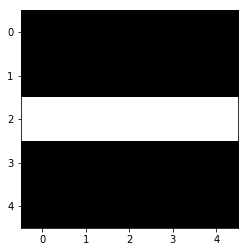

In [10]:
sigma_1_show = np.array(sigma_1).reshape(5, 5)
sigma_2_show = np.array(sigma_2).reshape(5, 5)
sigma_3_show = np.array(sigma_3).reshape(5, 5)
sigma_4_show = np.array(sigma_4).reshape(5, 5)
plt.imshow(sigma_1_show, cmap = cm.Greys_r)
# plt.imshow(sigma_2_show, cmap = cm.Greys_r)
# plt.imshow(sigma_3_show, cmap = cm.Greys_r)
# plt.imshow(sigma_4_show, cmap = cm.Greys_r)

In [13]:
s = np.zeros(shape=(25,25))

for i in range(25):
    for j in range(25):
        s[i][j] = 1/25 * (sigma_1[i] * sigma_1[j] + sigma_2[i] * sigma_2[j] + sigma_3[i] * sigma_3[j] + sigma_4[i] * sigma_4[j])
    
# print(25 * s)

This generates a 25 by 25 matrix of the coupling coefficients.

## 2) Assign the initial state $v_i(0)$ and update the network:

### Test with a sample squares, see if converge.

In [21]:
def tryTest(sigma_test):
    sigma_test_resized = np.array(sigma_test).reshape(5, 5)

    V = sigma_test # this is the initial state (I guess it's the where the tested image goes)
    new_V = np.ones(25)

    for i in range(25):
        total = 0
        for j in range(25):
            total += s[i][j] * V[j]

        # total signed total is just y
        if total >= 0:
            new_V[i] = 1
        else:
            new_V[i] = -1

    V = new_V
    # print(V)
    output = np.array(V).reshape(5, 5)

    f = plt.figure()
    f.add_subplot(121)
    plt.imshow(sigma_test_resized, cmap = cm.Greys_r)
    f.add_subplot(122)
    plt.imshow(output, cmap = cm.Greys_r)
    plt.show()

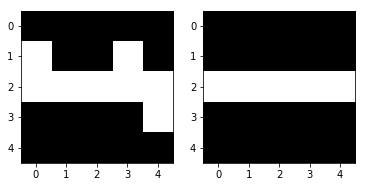

In [25]:
sigma_test = np.array([-1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1])
tryTest(sigma_test)

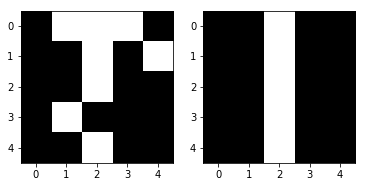

In [24]:
sigma_test2 = np.array([-1, 1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1])
tryTest(sigma_test2)

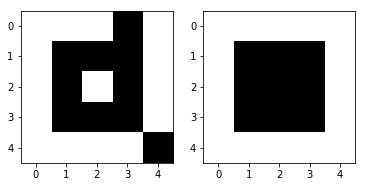

In [27]:
sigma_test3 = np.array([1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1])
tryTest(sigma_test3)

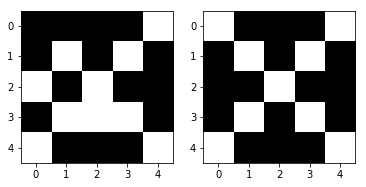

In [28]:
sigma_test4 = np.array([-1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1])
tryTest(sigma_test4)

The following is a spurious state:

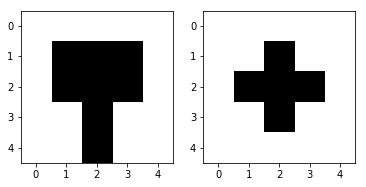

In [68]:
sigma_test5 = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1])
tryTest(sigma_test5)

First-order Star CNNs (this is the same thing as the basic weight change rules above)

## Second-order Star CNN

### 1) Two-cell CNNs [Zhou & Nosseck, 1991]

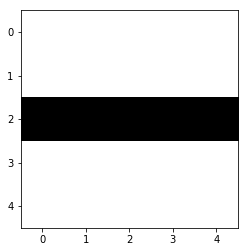

In [70]:
# this converges on the first pattern
V = sigma_test
Y = np.ones(25)

new_V = np.ones(25)
new_Y = np.ones(25)

def h(x):
    return(1/2 * ((abs(x + 1)) - abs(x - 1)) )

def sgn(x):
    if x >= 0:
        return 1
    else:
        return -1
    
saved_x = []
saved_y = []
timestamp = 10
for t in range(timestamp):
#     print(V[0])
    saved_x.append(V[0])
    saved_y.append(Y[0])
    
    for i in range(25):
        p=1.1; q=1.1; r=-2; k=2

        dx = -V[i] + p*h(V[i]) + r*h(Y[i])
        dy = -Y[i] + k*h(V[i]) + q*h(Y[i])

        total = 0
        for j in range(25):
            total += s[i][j] * V[j]

        dx += sgn(total)

        new_V[i] = V[i] + dx
        new_Y[i] = Y[i] + dy

    V = new_V
    Y = new_Y
# print(V)
new_array=[sgn(i) for i in V]
new_array_resized = np.array(new_array).reshape(5, 5)
plt.imshow(new_array_resized, cmap = cm.Greys_r)

In [ ]:
plt.plot([i + 1 for i in range(timestamp)], saved_x)
plt.xlabel("t")
plt.ylabel("x")
plt.show()

plt.plot([i + 1 for i in range(timestamp)], saved_y)
plt.xlabel("t")
plt.ylabel("y")
plt.show()